In [1]:
# check that the correct interpreter is used
import sys
print(sys.executable)


/home/matthias-reiser/Dokumente/Studium/Master/Semester_5/Precision_Machine_Design/MADE_24_Windtunnel_Code/Windtunnel_General_Calculations/Evaluate_Test_Results/env_statistic/bin/python3.12


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy
from scipy.stats import norm
import os

def load_data(file_path):
    if file_path.endswith('.csv'):
        data = pd.read_csv(file_path,
                           sep="\t", 
                            skiprows=3,          # Skip the first 3 rows to start at the data
                 decimal=',',         # Specify comma as the decimal separator
                 header=None          # Since column headers are complex, load without headers and add them later
                 )
    return data

# Load the data
cwd = os.getcwd()
print(cwd)
file_path = cwd + '/../../Docs/two_axis_test_sheet_full_system.csv'  # path to the .csv or .ods file
print(file_path)
# df = load_data(file_path)

# Load data, skipping the first 2 rows with headers, handling commas as decimals, and specifying tab as the separator
df = pd.read_csv(file_path, sep="\t", skiprows=2, decimal=",", header=None, skipfooter=4, engine="python")

# Define column names
df.columns = [
    "Load cell 7 - Top", "Load cell 3 - Top",
    "Load cell 7 - Drag", "Load cell 3 - Drag",
    "Load cell 7 - Drag stiffer", "Load cell 3 - Drag stiffer",
    "Load cell 7 - Drag height", "Load cell 3 - Drag height",
    "Load cell 7 - Drag pulley", "Load cell 3 - Drag pulley",
]

# Drop any rows with non-numeric data if present (e.g., 'mean drag', 'mean lift' rows at the end)
df = df.apply(pd.to_numeric, errors='coerce').dropna()

# Find the "Known mass" value by reading the first row
known_mass = 462.6  # You mentioned the known mass directly, we could also extract it if it’s in the file
accuracy_N = 0.2 # thats our target accuracy in N
accuracy_kg = accuracy_N * 9.81 # thats the target accuracy in gramms

/home/matthias-reiser/Dokumente/Studium/Master/Semester_5/Precision_Machine_Design/MADE_24_Windtunnel_Code/Windtunnel_General_Calculations/Evaluate_Test_Results
/home/matthias-reiser/Dokumente/Studium/Master/Semester_5/Precision_Machine_Design/MADE_24_Windtunnel_Code/Windtunnel_General_Calculations/Evaluate_Test_Results/../../Docs/two_axis_test_sheet_full_system.csv


In [9]:

# Compute the mean, std, and information content for each column
stats = {}
for col in df.columns:
    data = df[col].dropna()
    mean = data.mean()
    std_dev = data.std()
    # For information content, using entropy as a measure (can be thought of as spread)
    data_histogram = np.histogram(data, bins=10, density=True)[0]
    info_content = entropy(data_histogram)
    
    stats[col] = {"mean": mean, "std": std_dev, "information_content": info_content}

# Print computed statistics
for col, stat in stats.items():
    print(f"{col}: Mean = {stat['mean']}, Std Dev = {stat['std']}, Information Content = {stat['information_content']}")


Load cell 7 - Top: Mean = 462.079, Std Dev = 0.1678921611564289, Information Content = 1.7480673485460896
Load cell 3 - Top: Mean = 2.922, Std Dev = 0.09542885657214313, Information Content = 1.7480673485460887
Load cell 7 - Drag: Mean = 3.4910000000000005, Std Dev = 0.12931013537658637, Information Content = 1.74806734854609
Load cell 3 - Drag: Mean = 448.79800000000006, Std Dev = 1.282876975135693, Information Content = 1.8343719702816306
Load cell 7 - Drag stiffer: Mean = 4.450000000000001, Std Dev = 0.1186029791643814, Information Content = 1.695742534169634
Load cell 3 - Drag stiffer: Mean = 450.19899999999996, Std Dev = 1.4444641451647928, Information Content = 1.6094379124341005
Load cell 7 - Drag height: Mean = -1.065, Std Dev = 0.16426604437111564, Information Content = 1.8866967846580784
Load cell 3 - Drag height: Mean = 442.22200000000004, Std Dev = 0.6416956703401939, Information Content = 1.6094379124341223
Load cell 7 - Drag pulley: Mean = -0.47300000000000003, Std Dev = 

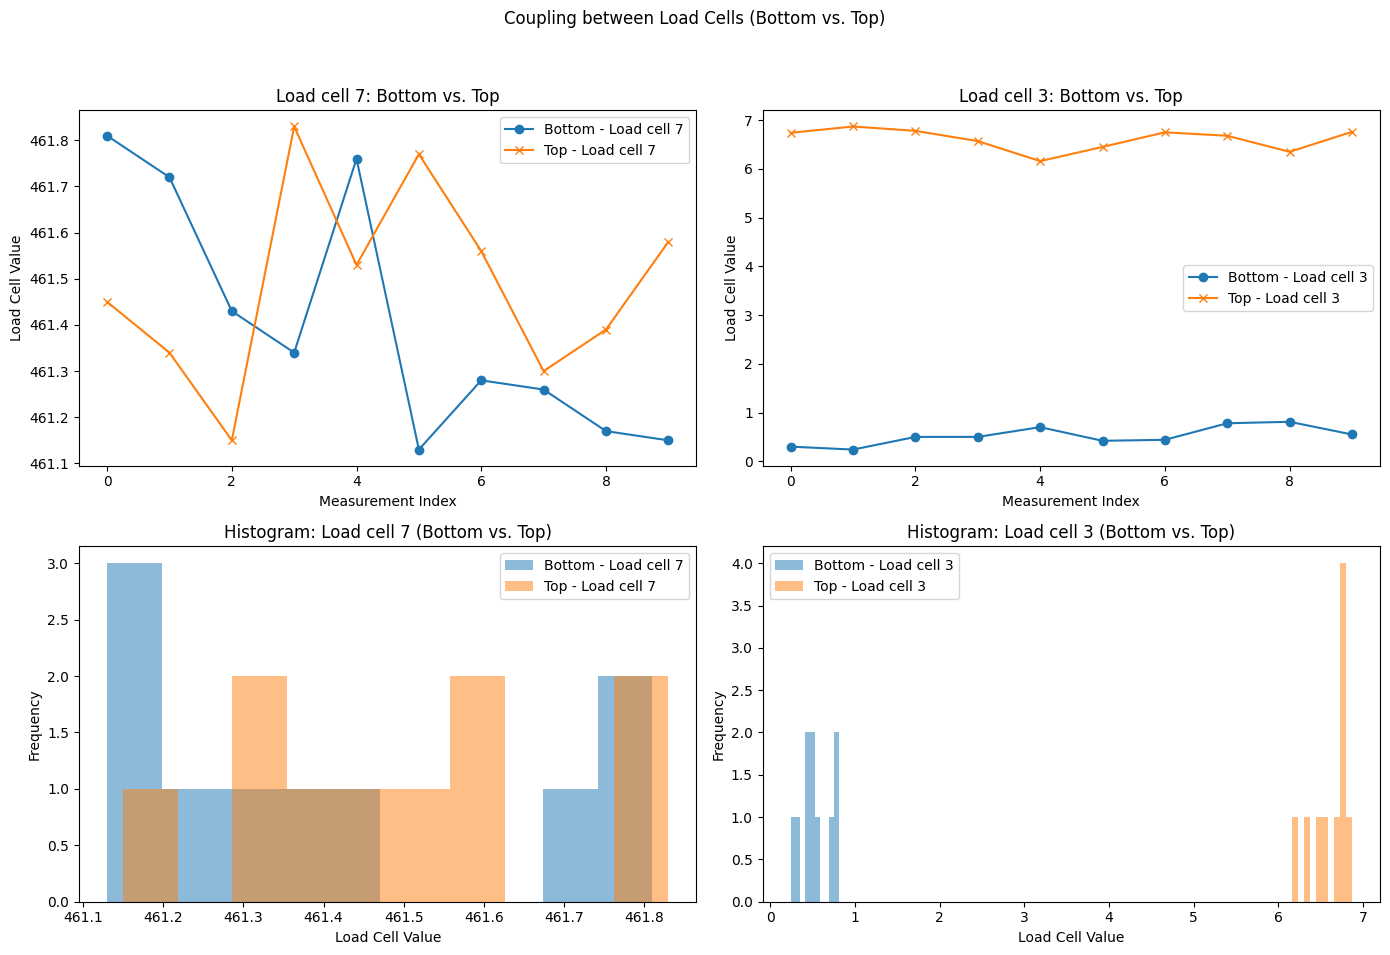

In [14]:

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Coupling between Load Cells (Bottom vs. Top)")

# Plot Load cell 7 values from bottom and top
axs[0, 0].plot(df["Load cell 7 - Bottom"], label="Bottom - Load cell 7", marker='o')
axs[0, 0].plot(df["Load cell 7 - Top"], label="Top - Load cell 7", marker='x')
axs[0, 0].set_title("Load cell 7: Bottom vs. Top")
axs[0, 0].set_xlabel("Measurement Index")
axs[0, 0].set_ylabel("Load Cell Value")
axs[0, 0].legend()

# Plot Load cell 3 values from bottom and top
axs[0, 1].plot(df["Load cell 3 - Bottom"], label="Bottom - Load cell 3", marker='o')
axs[0, 1].plot(df["Load cell 3 - Top"], label="Top - Load cell 3", marker='x')
axs[0, 1].set_title("Load cell 3: Bottom vs. Top")
axs[0, 1].set_xlabel("Measurement Index")
axs[0, 1].set_ylabel("Load Cell Value")
axs[0, 1].legend()

# Plot histogram for Load cell 7 (bottom vs. top) to visualize distribution
axs[1, 0].hist(df["Load cell 7 - Bottom"], bins=10, alpha=0.5, label="Bottom - Load cell 7")
axs[1, 0].hist(df["Load cell 7 - Top"], bins=10, alpha=0.5, label="Top - Load cell 7")
axs[1, 0].set_title("Histogram: Load cell 7 (Bottom vs. Top)")
axs[1, 0].set_xlabel("Load Cell Value")
axs[1, 0].set_ylabel("Frequency")
axs[1, 0].legend()

# Plot histogram for Load cell 3 (bottom vs. top) to visualize distribution
axs[1, 1].hist(df["Load cell 3 - Bottom"], bins=10, alpha=0.5, label="Bottom - Load cell 3")
axs[1, 1].hist(df["Load cell 3 - Top"], bins=10, alpha=0.5, label="Top - Load cell 3")
axs[1, 1].set_title("Histogram: Load cell 3 (Bottom vs. Top)")
axs[1, 1].set_xlabel("Load Cell Value")
axs[1, 1].set_ylabel("Frequency")
axs[1, 1].legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


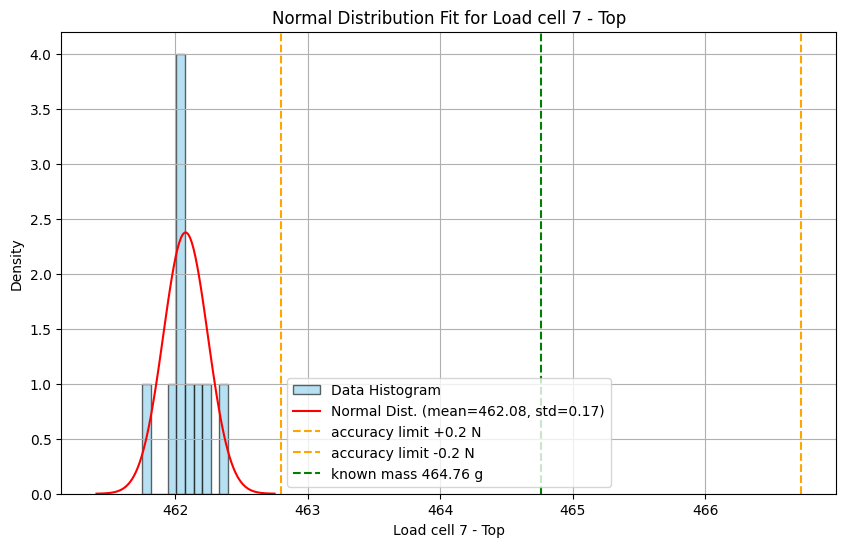

In [46]:


# Select a column for which to plot the distribution, e.g., "Load cell 7 - Bottom"
column = "Load cell 7 - Top"
data = df[column]

# Calculate mean and standard deviation
mean = data.mean()
std_dev = data.std()



upper_limit = known_mass + accuracy_kg
lower_limit = known_mass - accuracy_kg
# Create values for the normal distribution curve
x_values = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 100)
normal_dist_curve = norm.pdf(x_values, mean, std_dev)

# Plot the histogram of the data
plt.figure(figsize=(10, 6))
plt.hist(data, bins=10, density=False, alpha=0.6, color="skyblue", edgecolor="black", label="Data Histogram")

# Plot the normal distribution curve
plt.plot(x_values, normal_dist_curve, color="red", label=f"Normal Dist. (mean={mean:.2f}, std={std_dev:.2f})")

plt.axvline(upper_limit, color = 'orange', linestyle='--', label=f'accuracy limit +{accuracy_N} N')
plt.axvline(lower_limit, color = 'orange', linestyle='--', label=f'accuracy limit -{accuracy_N} N')
plt.axvline(known_mass, color = 'green', linestyle='--', label=f'known mass {known_mass} g')

# Add titles and labels
plt.title(f"Normal Distribution Fit for {column}")
plt.xlabel(column)
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()


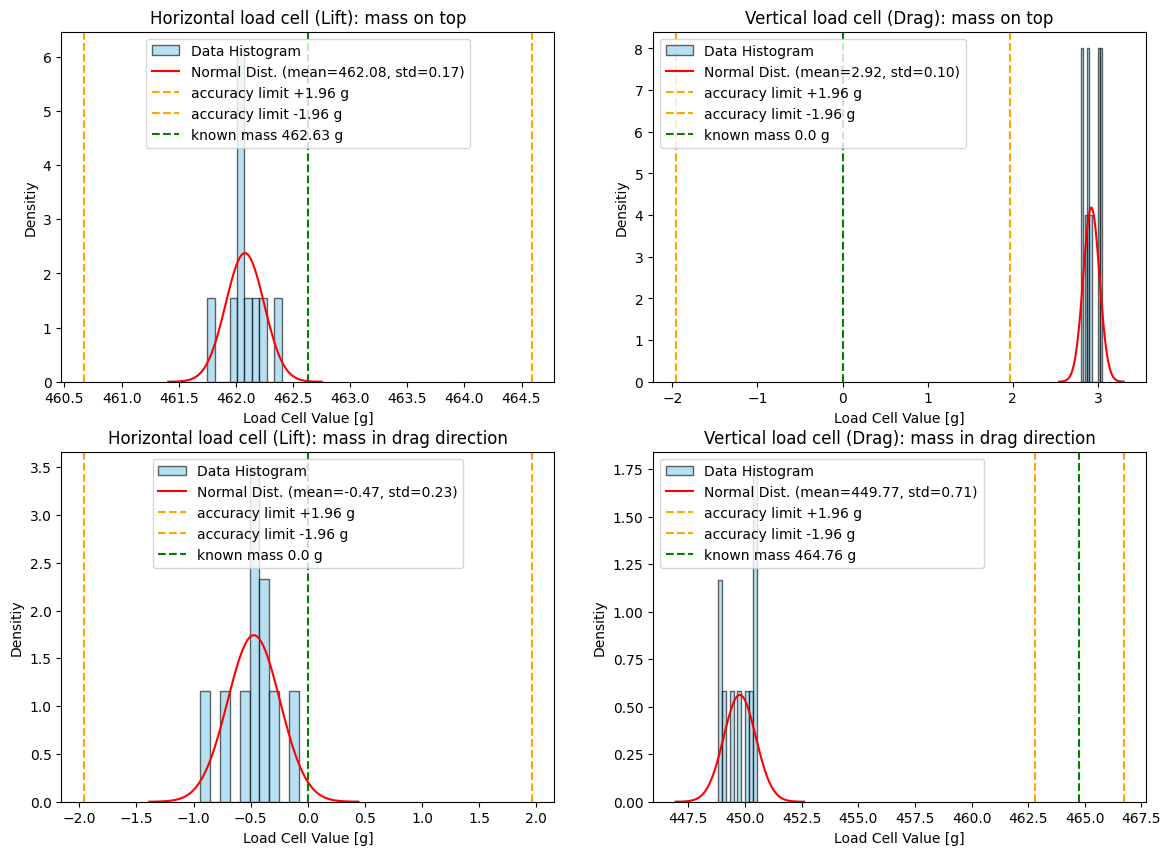

In [52]:
# Plotting
fig, axs = plt.subplots(2, 2 ,figsize=(14, 10)) #, sharex=True
# fig.suptitle("Full system: coupling between loading in lift and in drag direction")

column_7t = "Load cell 7 - Top" # Loading from top
column_3t = "Load cell 3 - Top" # Loading from top
column_7p = "Load cell 7 - Drag pulley" # Loading in drag direction  Pulley aligned with measurement point
column_3p = "Load cell 3 - Drag pulley" # Loading in drag direction  Pulley aligned with measurement point
data_7t = df[column_7t]
data_3t = df[column_3t]
data_7p = df[column_7p]
data_3p = df[column_3p]

known_mass = 462.63

upper_limit = known_mass + accuracy_kg
lower_limit = known_mass - accuracy_kg

# Calculate mean and standard deviation for top
mean = data_7t.mean()
std_dev = data_7t.std()

x_values_t = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 100)
normal_dist_curve_t = norm.pdf(x_values_t, mean, std_dev)

axs[0, 0].hist(data_7t, bins=10, density=True, alpha=0.6, color="skyblue", edgecolor="black", label="Data Histogram")
axs[0, 0].plot(x_values_t, normal_dist_curve_t, color="red", label=f"Normal Dist. (mean={mean:.2f}, std={std_dev:.2f})")

axs[0, 0].axvline(upper_limit, color = 'orange', linestyle='--', label=f'accuracy limit +{accuracy_kg:.2f} g')
axs[0, 0].axvline(lower_limit, color = 'orange', linestyle='--', label=f'accuracy limit -{accuracy_kg:.2f} g')
axs[0, 0].axvline(known_mass, color = 'green', linestyle='--', label=f'known mass {known_mass} g')
axs[0, 0].set_title("Horizontal load cell (Lift): mass on top")
axs[0, 0].set_xlabel("Load Cell Value [g]")
axs[0, 0].set_ylabel("Densitiy")
axs[0, 0].legend()

known_mass = 0.00

upper_limit = known_mass + accuracy_kg
lower_limit = known_mass - accuracy_kg


# Calculate mean and standard deviation for bottom
mean = data_3t.mean()
std_dev = data_3t.std()

# Create values for the normal distribution curve bottom
x_values_b = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 100)
normal_dist_curve_b = norm.pdf(x_values_b, mean, std_dev)


axs[0, 1].hist(data_3t, bins=10, density=True, alpha=0.6, color="skyblue", edgecolor="black", label="Data Histogram")
axs[0, 1].plot(x_values_b, normal_dist_curve_b, color="red", label=f"Normal Dist. (mean={mean:.2f}, std={std_dev:.2f})")

axs[0, 1].axvline(upper_limit, color = 'orange', linestyle='--', label=f'accuracy limit +{accuracy_kg:.2f} g')
axs[0, 1].axvline(lower_limit, color = 'orange', linestyle='--', label=f'accuracy limit -{accuracy_kg:.2f} g')
axs[0, 1].axvline(known_mass, color = 'green', linestyle='--', label=f'known mass {known_mass} g')
axs[0, 1].set_title("Vertical load cell (Drag): mass on top")
axs[0, 1].set_xlabel("Load Cell Value [g]")
axs[0, 1].set_ylabel("Densitiy")
axs[0, 1].legend()

##################################################################
# drag test
##################################################################
known_mass = 0.00

upper_limit = known_mass + accuracy_kg
lower_limit = known_mass - accuracy_kg

# Calculate mean and standard deviation for top
mean = data_7p.mean()
std_dev = data_7p.std()

x_values_7p = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 100)
normal_dist_curve_7p = norm.pdf(x_values_7p, mean, std_dev)

axs[1, 0].hist(data_7p, bins=10, density=True, alpha=0.6, color="skyblue", edgecolor="black", label="Data Histogram")
axs[1, 0].plot(x_values_7p, normal_dist_curve_7p, color="red", label=f"Normal Dist. (mean={mean:.2f}, std={std_dev:.2f})")

axs[1, 0].axvline(upper_limit, color = 'orange', linestyle='--', label=f'accuracy limit +{accuracy_kg:.2f} g')
axs[1, 0].axvline(lower_limit, color = 'orange', linestyle='--', label=f'accuracy limit -{accuracy_kg:.2f} g')
axs[1, 0].axvline(known_mass, color = 'green', linestyle='--', label=f'known mass {known_mass} g')
axs[1, 0].set_title("Horizontal load cell (Lift): mass in drag direction")
axs[1, 0].set_xlabel("Load Cell Value [g]")
axs[1, 0].set_ylabel("Densitiy")
axs[1, 0].legend()

known_mass = 464.76

upper_limit = known_mass + accuracy_kg
lower_limit = known_mass - accuracy_kg

# Calculate mean and standard deviation for bottom
mean = data_3p.mean()
std_dev = data_3p.std()

# Create values for the normal distribution curve bottom
x_values_b = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 100)
normal_dist_curve_b = norm.pdf(x_values_b, mean, std_dev)


axs[1, 1].hist(data_3p, bins=10, density=True, alpha=0.6, color="skyblue", edgecolor="black", label="Data Histogram")
axs[1, 1].plot(x_values_b, normal_dist_curve_b, color="red", label=f"Normal Dist. (mean={mean:.2f}, std={std_dev:.2f})")

axs[1, 1].axvline(upper_limit, color = 'orange', linestyle='--', label=f'accuracy limit +{accuracy_kg:.2f} g')
axs[1, 1].axvline(lower_limit, color = 'orange', linestyle='--', label=f'accuracy limit -{accuracy_kg:.2f} g')
axs[1, 1].axvline(known_mass, color = 'green', linestyle='--', label=f'known mass {known_mass} g')
axs[1, 1].set_title("Vertical load cell (Drag): mass in drag direction")
axs[1, 1].set_xlabel("Load Cell Value [g]")
axs[1, 1].set_ylabel("Densitiy")
axs[1, 1].legend()





In [50]:
# Save the figure if necessary
fig_name = cwd + '/../../Docs/images/Fullsystem_coupling_lift_drag.eps'
fig.savefig(fig_name, format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
